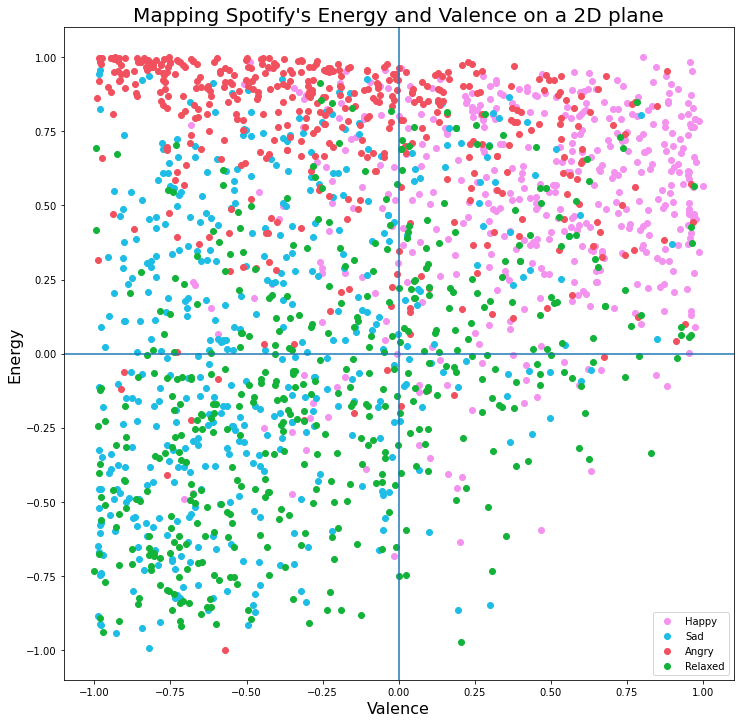

In [321]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

df = pd.read_csv("data/preprocessed/spotify-data-preprocessed.csv", index_col=0)

av = df[["valence", "energy"]].to_numpy()
labels = df[["is_happy", "is_sad", "is_angry", "is_relaxed"]].to_numpy()

av[:, 0] -= np.min(av[:, 0])
av[:, 1] -= np.min(av[:, 1])

max_x = np.max(av[:, 0])
max_y = np.max(av[:, 1])

av[:, 0] /= max_x * 0.5
av[:, 1] /= max_y * 0.5

av[:, 0] -= 1
av[:, 1] -= 1

plt.figure(figsize=(12, 12))
plt.scatter(av[np.where(labels[:, 0]==1), 0], av[np.where(labels[:, 0]==1), 1], label="Happy", c="#f492f0")
plt.scatter(av[np.where(labels[:, 1]==1), 0], av[np.where(labels[:, 1]==1), 1], label="Sad", c="#1dbde6")
plt.scatter(av[np.where(labels[:, 2]==1), 0], av[np.where(labels[:, 2]==1), 1], label="Angry", c="#f1515e")
plt.scatter(av[np.where(labels[:, 3]==1), 0], av[np.where(labels[:, 3]==1), 1], label="Relaxed", c="#13B238")
plt.axhline(0)
plt.axvline(0)
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.xlabel("Valence", fontsize=16)
plt.ylabel("Energy", fontsize=16)
plt.title("Mapping Spotify's Energy and Valence on a 2D plane", fontsize=20)
plt.legend()

plt.savefig("graphs/energy-valence-spotify.png")

In [323]:
av = df.to_numpy()[:, 2:-4]
labels = df[["is_happy", "is_sad", "is_angry", "is_relaxed"]].to_numpy()

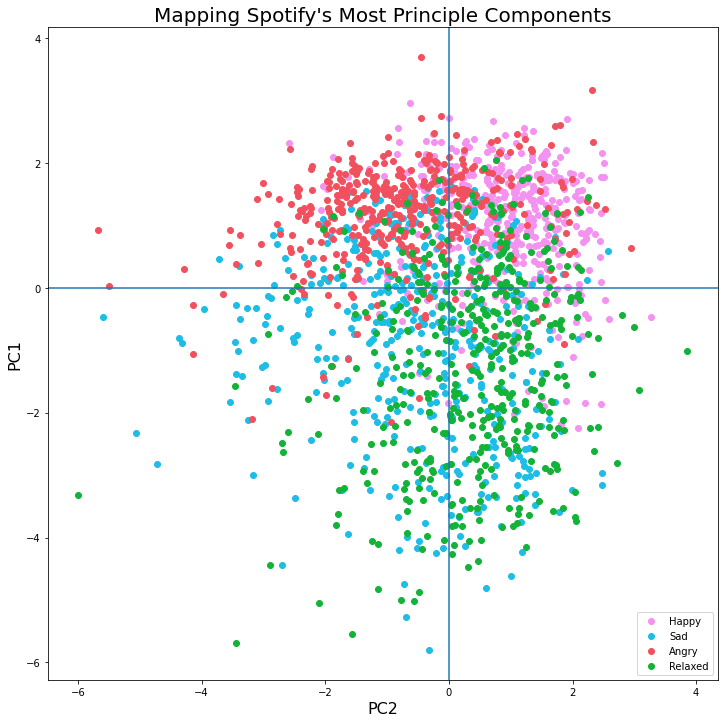

In [327]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

av = pca.fit_transform(av) * -1

plt.figure(figsize=(12, 12))
plt.scatter(av[np.where(labels[:, 0]==1), 1], av[np.where(labels[:, 0]==1), 0], label="Happy", c="#f492f0")
plt.scatter(av[np.where(labels[:, 1]==1), 1], av[np.where(labels[:, 1]==1), 0], label="Sad", c="#1dbde6")
plt.scatter(av[np.where(labels[:, 2]==1), 1], av[np.where(labels[:, 2]==1), 0], label="Angry", c="#f1515e")
plt.scatter(av[np.where(labels[:, 3]==1), 1], av[np.where(labels[:, 3]==1), 0], label="Relaxed", c="#13B238")
plt.axhline(0)
plt.axvline(0)
plt.xlabel("PC2", fontsize=16)
plt.ylabel("PC1", fontsize=16)
plt.title("Mapping Spotify's Most Principle Components", fontsize=20)
plt.legend(loc='lower right')

plt.savefig("graphs/PCAs-spotify.png")
# Flipped x - y axis and multiplied by (-1)

In [172]:
pca.explained_variance_ratio_

array([0.27079795, 0.17696338])

In [281]:
embeddings = pd.read_csv("data/preprocessed/embeddings.csv", index_col=0).to_numpy()
av = df.to_numpy()[:, 2:-4]
labels = df[["is_happy", "is_sad", "is_angry", "is_relaxed"]].to_numpy()

In [282]:
concat = np.hstack((av, embeddings))

In [294]:
extra_labels = [f"embed_{x}" for x in range(embeddings.shape[1])]
df_concat = pd.DataFrame(concat, columns=list(df.columns[2:-4]) + extra_labels)
df_concat.drop(["energy", "valence"], axis=1)

,mode,duration_ms,tempo,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,embed_0,...,embed_40,embed_41,embed_42,embed_43,embed_44,embed_45,embed_46,embed_47,embed_48,embed_49
0,0,2.9188,-0.774358,1.72264,-1.14417,-0.263275,-0.800056,-0.385589,-0.893534,-0.236062,...,-0.196426,-0.00643023,-0.322219,0.123811,0.0673506,0.170758,-0.0443741,0.0365381,-0.180735,-0.0839375
1,1,0.301247,-0.301991,0.16568,1.06542,-0.530087,-0.814862,-0.461386,1.65482,-0.241716,...,-0.262771,-0.105034,-0.314464,0.219236,0.145908,0.313893,-0.140653,-0.0700452,-0.118627,-0.0864889
2,1,-0.00786324,-0.497783,0.680849,-0.691171,-0.561257,2.09019,-0.484803,-0.535309,-0.269608,...,-0.119059,-0.047706,-0.26218,0.302232,0.154534,0.217945,-0.0613493,-0.0865716,-0.0736902,-0.05813
3,1,2.20355,-1.46069,-1.83776,0.553989,-0.567491,1.59699,-0.486288,-0.145046,-0.226653,...,-0.0947106,-0.055747,-0.177865,0.294663,0.128984,0.0788962,-0.0427216,-0.10833,-0.180836,-0.171467
4,1,-0.744788,-0.995851,0.343127,0.873285,0.400016,-0.81572,-0.486327,-0.767136,-0.251408,...,-0.0904537,-0.0732882,-0.229277,0.226237,0.114849,0.206238,-0.0840647,-0.0794225,-0.0637627,-0.0103935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,1,-0.459675,1.07301,-1.58017,2.19745,0.400016,-0.804926,-0.461792,-0.162521,-0.267358,...,-0.145466,-0.0758195,-0.213229,0.231824,0.174663,0.232664,-0.0617691,-0.0801735,-0.0438629,-0.112665
1741,1,0.991214,1.61692,1.12733,-0.85713,0.873796,-0.766937,3.02731,-0.564433,-0.290311,...,0.109193,-0.178172,-0.0616681,0.134378,0.168163,0.383949,-0.0898314,0.0523982,0.253314,-0.0433719
1742,0,0.441742,1.29403,-1.72328,0.752906,2.91853,-0.813657,-0.361217,-0.655882,-0.322039,...,-0.120871,-0.0604954,-0.178341,0.256636,0.196894,0.275235,-0.0668421,-0.132007,0.0197917,-0.0465351
1743,1,-0.534238,0.431109,-0.080457,-0.041126,-0.602401,1.14125,-0.48596,-0.00525108,-0.318486,...,-0.0937829,-0.0601251,-0.208824,0.227974,0.131802,0.183001,-0.0507257,-0.0931904,-0.039681,-0.0649013


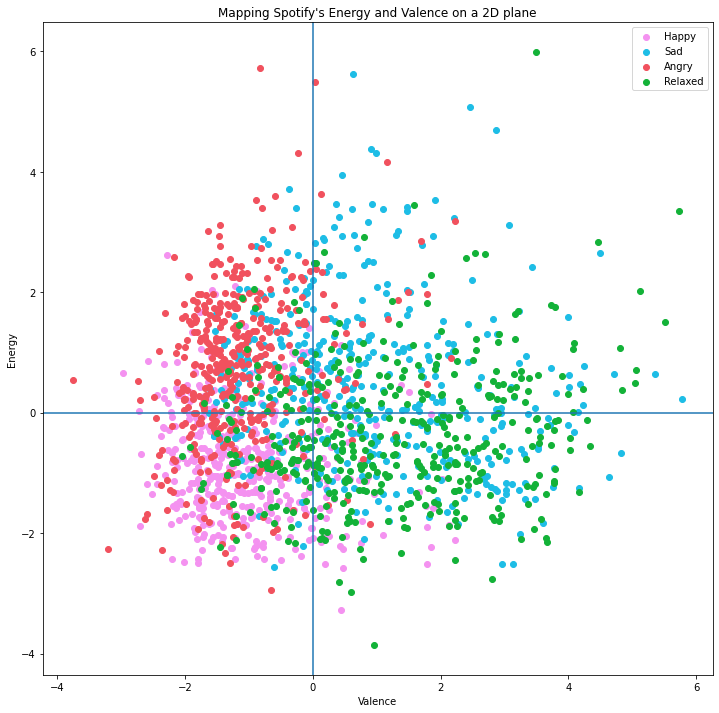

In [295]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

av = pca.fit_transform(df_concat)

# av[:, 0] -= np.min(av[:, 0])
# av[:, 1] -= np.min(av[:, 1])

# max_x = np.max(av[:, 0])
# max_y = np.max(av[:, 1])

# av[:, 0] /= max_x * 0.5
# av[:, 1] /= max_y * 0.5

# av[:, 0] -= 1
# av[:, 1] -= 1

plt.figure(figsize=(12, 12))
plt.scatter(av[np.where(labels[:, 0]==1), 0], av[np.where(labels[:, 0]==1), 1], label="Happy", c="#f492f0")
plt.scatter(av[np.where(labels[:, 1]==1), 0], av[np.where(labels[:, 1]==1), 1], label="Sad", c="#1dbde6")
plt.scatter(av[np.where(labels[:, 2]==1), 0], av[np.where(labels[:, 2]==1), 1], label="Angry", c="#f1515e")
plt.scatter(av[np.where(labels[:, 3]==1), 0], av[np.where(labels[:, 3]==1), 1], label="Relaxed", c="#13B238")
plt.axhline(0)
plt.axvline(0)
# plt.xlim((-1.1, 1.1))
# plt.ylim((-1.1, 1.1))
plt.xlabel("Valence")
plt.ylabel("Energy")
plt.title("Mapping Spotify's Energy and Valence on a 2D plane")
plt.legend()

In [305]:
_labels = np.array([np.argmax(x) for x in labels])
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier


skf = StratifiedKFold(n_splits=5)
accs = []
X = av ; y = _labels
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index ], y[test_index]

    model = ExtraTreesClassifier(n_estimators=420)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accs += [accuracy_score(y_test, y_pred)]
print(f"Average accuracy: {np.mean(accs)}")

Average accuracy: 0.532378223495702


In [285]:
extra_labels = [f"embed_{x}" for x in range(embeddings.shape[1])]
df_concat = pd.DataFrame(concat, columns=list(df.columns[2:-4]) + extra_labels)
df_concat.drop(["energy", "valence"], axis=1)

In [317]:
print(pca.components_[1])

[-1.99780357e-02  3.95238797e-01  1.98128344e-01 -5.70725138e-01
  1.93270752e-01  1.19830018e-01 -1.44978943e-02 -2.34552363e-01
  3.50161312e-01  1.43553808e-01 -4.77164298e-01 -4.69429492e-03
 -1.45133900e-03  2.91119216e-03  1.67159764e-03 -1.66821721e-03
 -1.13572753e-03 -2.23676562e-03  1.10559014e-05  1.32422953e-03
 -1.87401066e-03 -4.11677446e-04  3.20808000e-03 -5.59568178e-03
  3.34692977e-03  5.25632810e-04 -4.10862340e-03  3.39944504e-03
 -2.08508240e-03  7.11683488e-03 -1.83145372e-03  2.16294213e-03
  1.50894010e-03 -1.10520380e-03  1.77748241e-04 -7.88580295e-04
  1.09225470e-02  4.37602208e-03  5.01275619e-03 -4.08252492e-03
 -2.36435796e-03  3.92501814e-05  1.12345472e-05  9.30657474e-04
 -5.73478725e-03  5.59808589e-03  2.31486846e-03 -1.56680894e-03
 -6.01901746e-04  1.85222870e-03 -2.25311566e-04  2.73110550e-03
 -2.81360097e-03  5.52244505e-03  2.63996975e-03 -2.95134535e-03
 -2.28825508e-03 -5.80167787e-04 -4.88069416e-03  5.26951115e-04
  2.91339900e-03]
